<a href="https://www.kaggle.com/code/anderaraujo/student-grades-mat-x-alcohol?scriptVersionId=105652198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)
* These grades are related with the course subject, Math or Portuguese:
* 
* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

## Loading data

In [2]:
data = pd.read_csv('../input/student-alcohol-consumption/student-mat.csv')

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Correlation visualization

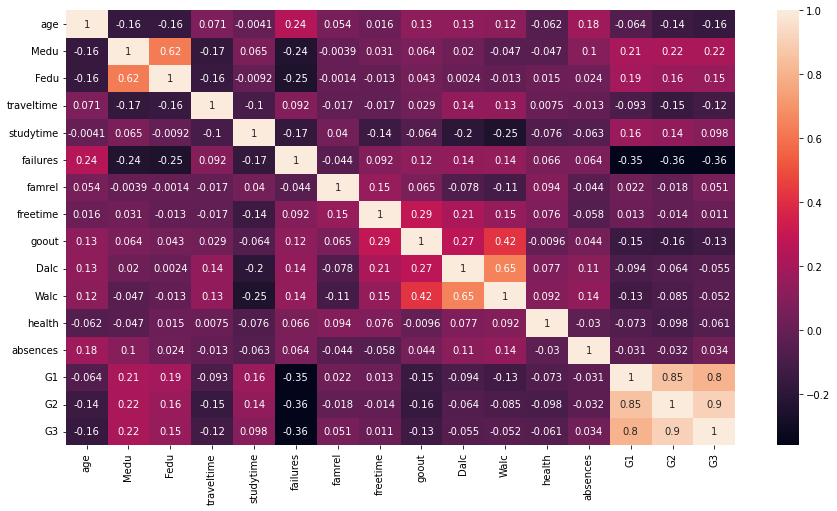

In [4]:
plt.figure(figsize= (15,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [5]:
# most likely a students which started in bad way won't change their grades

data.drop(['G1','G2'], axis = 1, inplace = True)

## Preprocessing data

In [6]:
# checking null

data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

## Separating categorical from numerical values

In [7]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G3             int64
dtype: object

In [8]:
{col:data[col].unique().tolist() for col in data.select_dtypes(include = 'object').columns}

{'school': ['GP', 'MS'],
 'sex': ['F', 'M'],
 'address': ['U', 'R'],
 'famsize': ['GT3', 'LE3'],
 'Pstatus': ['A', 'T'],
 'Mjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Fjob': ['teacher', 'other', 'services', 'health', 'at_home'],
 'reason': ['course', 'other', 'home', 'reputation'],
 'guardian': ['mother', 'father', 'other'],
 'schoolsup': ['yes', 'no'],
 'famsup': ['no', 'yes'],
 'paid': ['no', 'yes'],
 'activities': ['no', 'yes'],
 'nursery': ['yes', 'no'],
 'higher': ['yes', 'no'],
 'internet': ['no', 'yes'],
 'romantic': ['no', 'yes']}

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [10]:
# Separating binary cols for Label encoder

nomnumeric = [col for col in data.columns if data[col].dtype == 'object']
numerics = [col for col in data.columns if data[col].dtype == 'int64' or data[col].dtype == 'float64']

In [11]:
nomnumeric

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [12]:
numerics

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G3']

In [13]:
{col: data[col].unique().tolist() for col in nomnumeric}

{'school': ['GP', 'MS'],
 'sex': ['F', 'M'],
 'address': ['U', 'R'],
 'famsize': ['GT3', 'LE3'],
 'Pstatus': ['A', 'T'],
 'Mjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Fjob': ['teacher', 'other', 'services', 'health', 'at_home'],
 'reason': ['course', 'other', 'home', 'reputation'],
 'guardian': ['mother', 'father', 'other'],
 'schoolsup': ['yes', 'no'],
 'famsup': ['no', 'yes'],
 'paid': ['no', 'yes'],
 'activities': ['no', 'yes'],
 'nursery': ['yes', 'no'],
 'higher': ['yes', 'no'],
 'internet': ['no', 'yes'],
 'romantic': ['no', 'yes']}

In [14]:
dummies = pd.get_dummies(data.loc[:,['Mjob','Fjob','reason','guardian']])

In [15]:
data = pd.concat([data, dummies], axis = 1)
data.drop(['Mjob','Fjob','reason','guardian'], axis= 1, inplace = True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


## Scaling

In [16]:
le = LabelEncoder()

In [17]:
for col in data.columns:
    if data[col].unique().size == 2 and data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [18]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [19]:
se = StandardScaler()

In [20]:
x = data.drop(['G3'], axis = 1)
y = data['G3']

In [21]:
x = pd.DataFrame(se.fit_transform(x), columns= x.columns)
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,-0.363050,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,0.792251,-0.042286,...,-1.104129,-0.625176,3.552561,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
1,-0.363050,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
2,-0.363050,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,3.157883,-0.601722,-0.543214,0.668496,-0.296908
3,-0.363050,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.643249,1.150779,...,-1.104129,1.599549,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
4,-0.363050,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.754443,1.054656,2.592380,0.535392,1.570004,-2.938392,-0.685387,-0.479857,-0.643249,-0.042286,...,-1.104129,1.599549,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,-1.495896,3.368048
391,2.754443,1.054656,0.238380,0.535392,1.570004,0.340322,0.229234,-1.399970,0.792251,-1.235351,...,-1.104129,1.599549,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
392,2.754443,1.054656,3.377047,-1.867789,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,-1.235351,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,-1.495896,3.368048
393,2.754443,1.054656,1.023046,-1.867789,1.570004,0.340322,0.229234,-0.479857,2.227751,-1.235351,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908


## Training

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7)

## Model

In [23]:
for n in np.arange(2, 20):
    tree = XGBRegressor(n_estimators = 30, max_depth = n)
    tree.fit(x_train, y_train)
    tree.predict(x_test)
    print(f'{tree.score(x_test, y_test)}')

0.2537562437362674
0.229445624244769
0.20186672772158432
0.13369840750337136
0.1587197926359416
0.1084045513910733
0.1346367627157098
0.1554113683470617
0.10609696942941826
0.20483097241858284
0.20498404873871667
0.18078502465650093
0.1730787423451864
0.17259641168204198
0.17268749275375572
0.17268837104565304
0.1726886877343562
0.1726886877343562


## Feature importances

In [24]:
importances = {name: importance for name, importance in zip(tree.feature_names_in_, tree.feature_importances_)}

In [25]:
importances

{'school': 0.012342868,
 'sex': 0.005441219,
 'age': 0.006344291,
 'address': 0.005226203,
 'famsize': 0.0031409848,
 'Pstatus': 0.0051420247,
 'Medu': 0.003512861,
 'Fedu': 0.009246198,
 'traveltime': 0.023972966,
 'studytime': 0.018370938,
 'failures': 0.19216432,
 'schoolsup': 0.03025063,
 'famsup': 0.020210413,
 'paid': 0.0098002795,
 'activities': 0.016337981,
 'nursery': 0.016091123,
 'higher': 0.09023454,
 'internet': 0.020178614,
 'romantic': 0.009176673,
 'famrel': 0.0071340958,
 'freetime': 0.009014559,
 'goout': 0.0123893935,
 'Dalc': 0.0111232875,
 'Walc': 0.011526179,
 'health': 0.011807813,
 'absences': 0.055162266,
 'Mjob_at_home': 0.03898047,
 'Mjob_health': 0.0016897824,
 'Mjob_other': 0.013520174,
 'Mjob_services': 0.022470586,
 'Mjob_teacher': 0.005239176,
 'Fjob_at_home': 0.021000095,
 'Fjob_health': 0.009274106,
 'Fjob_other': 0.0060693794,
 'Fjob_services': 0.04191143,
 'Fjob_teacher': 0.0050268974,
 'reason_course': 0.016002875,
 'reason_home': 0.029549215,
 'rea

In [26]:
importances_df = pd.DataFrame(importances.values(), importances.keys(), columns = ['importances']).sort_values(by = 'importances')

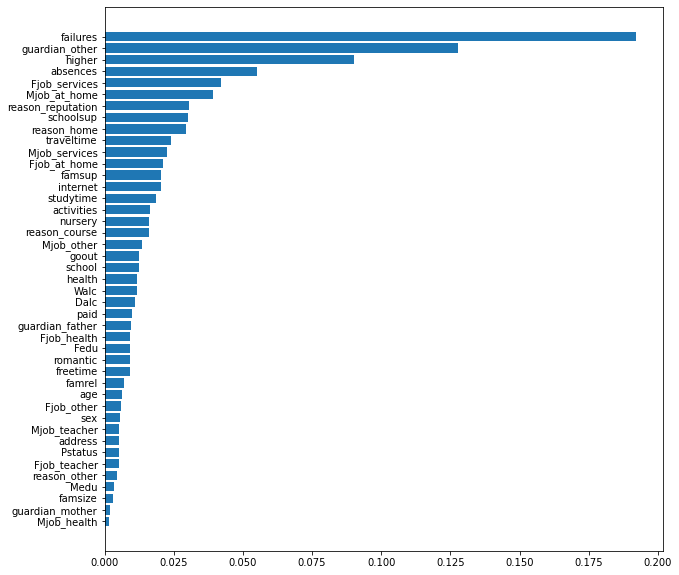

In [27]:
fig, ax  = plt.subplots(figsize = (10,10))
ax.barh (y = importances_df.index, width = importances_df['importances'])
plt.show()

### The model did not predict well the grades with these features. The best score was 0.28 which is not significant